<a href="https://colab.research.google.com/github/Jitendra4Jalwaniya/Word2Vec-algorithm/blob/main/word2vec_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# defining a small corpus

corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

In [24]:
# creating a vocabulary

def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

tokenized_corpus = tokenize_corpus(corpus)
tokenized_corpus

[['he', 'is', 'a', 'king'],
 ['she', 'is', 'a', 'queen'],
 ['he', 'is', 'a', 'man'],
 ['she', 'is', 'a', 'woman'],
 ['warsaw', 'is', 'poland', 'capital'],
 ['berlin', 'is', 'germany', 'capital'],
 ['paris', 'is', 'france', 'capital']]

In [25]:
vocabulary = []

for sentence in tokenized_corpus:
  for token in sentence:
    if token not in vocabulary:
      vocabulary.append(token)

word2idx = {w: idx for (idx,w) in enumerate(vocabulary)}
idx2word = {idx:w for (idx,w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

print(idx2word)

{0: 'he', 1: 'is', 2: 'a', 3: 'king', 4: 'she', 5: 'queen', 6: 'man', 7: 'woman', 8: 'warsaw', 9: 'poland', 10: 'capital', 11: 'berlin', 12: 'germany', 13: 'paris', 14: 'france'}


In [26]:
# lets generate (center word, context word) pairs
# context window = 2

import numpy as np
window_size = 2
idx_pairs = []

# for each sentence
for sentence in tokenized_corpus:
  indices = [word2idx[word] for word in sentence]
  for center_word_pos in range(len(indices)):
    for w in range(-window_size,window_size +1):
      context_word_pos = center_word_pos + w
      if context_word_pos<0 or context_word_pos>=len(indices) or center_word_pos==context_word_pos:
        continue
      context_word_idx=indices[context_word_pos]
      idx_pairs.append((indices[center_word_pos],context_word_idx))

idx_pairs=np.array(idx_pairs)
idx_pairs

array([[ 0,  1],
       [ 0,  2],
       [ 1,  0],
       [ 1,  2],
       [ 1,  3],
       [ 2,  0],
       [ 2,  1],
       [ 2,  3],
       [ 3,  1],
       [ 3,  2],
       [ 4,  1],
       [ 4,  2],
       [ 1,  4],
       [ 1,  2],
       [ 1,  5],
       [ 2,  4],
       [ 2,  1],
       [ 2,  5],
       [ 5,  1],
       [ 5,  2],
       [ 0,  1],
       [ 0,  2],
       [ 1,  0],
       [ 1,  2],
       [ 1,  6],
       [ 2,  0],
       [ 2,  1],
       [ 2,  6],
       [ 6,  1],
       [ 6,  2],
       [ 4,  1],
       [ 4,  2],
       [ 1,  4],
       [ 1,  2],
       [ 1,  7],
       [ 2,  4],
       [ 2,  1],
       [ 2,  7],
       [ 7,  1],
       [ 7,  2],
       [ 8,  1],
       [ 8,  9],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 9,  8],
       [ 9,  1],
       [ 9, 10],
       [10,  1],
       [10,  9],
       [11,  1],
       [11, 12],
       [ 1, 11],
       [ 1, 12],
       [ 1, 10],
       [12, 11],
       [12,  1],
       [12, 10],
       [10,  1

In [27]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

In [28]:
# lets define the input layer using one-hot representation

def get_input_layer(word_idx):
  x=torch.zeros(vocabulary_size).float()
  return x

In [29]:
# training loop

embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 100
learning_rate = 0.001

for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.data
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

Loss at epo 0: 2.708052396774292
Loss at epo 10: 2.708052396774292
Loss at epo 20: 2.708052396774292
Loss at epo 30: 2.708052396774292
Loss at epo 40: 2.708052396774292
Loss at epo 50: 2.708052396774292
Loss at epo 60: 2.708052396774292
Loss at epo 70: 2.708052396774292
Loss at epo 80: 2.708052396774292
Loss at epo 90: 2.708052396774292


In [34]:
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization

In [37]:
ww1 = W1.cpu().detach().numpy()
ww2 = W2.cpu().detach().numpy()

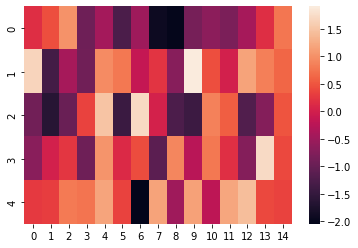

In [39]:
sns.heatmap(ww1)

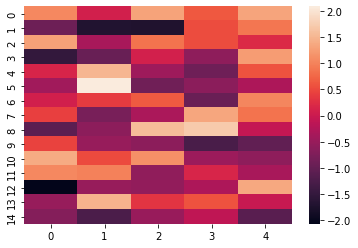

In [40]:
sns.heatmap(ww2)